# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

There are quite a few goals for this case study.

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing all the relevant libraries

In [202]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

In [203]:
df = pd.read_csv('Leads.csv')
df.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [204]:
df.shape

(9240, 37)

In [205]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [207]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [208]:
### We can see that there are some outliers present in a few columns like: Total Visits, Total time spent on website

### Checking for null values

In [209]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Conversion Ratio:

In [210]:
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100

In [211]:
conversion

38.53896103896104

The dataset has a conversion rate of 38.53%

### Missing Values Treatment

In [212]:
df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,503104bf-12ad-4228-bef9-233fd42db26b,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [213]:
print(df.Country.unique())
print("-"*100)
print(df['City'].unique())
print("-"*100)

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']
----------------------------------------------------------------------------------------------------
['Select' 'Mumbai' nan 'Thane & Outskirts' 'Other Metro Cities'
 'Other Cities' 'Other Cities of Maharashtra' 'Tier II Cities']
----------------------------------------------------------------------------------------------------


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

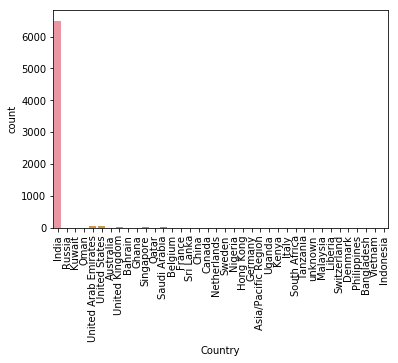

In [214]:
sns.countplot(df.Country)
xticks(rotation = 90)

### Missing Values Treatment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

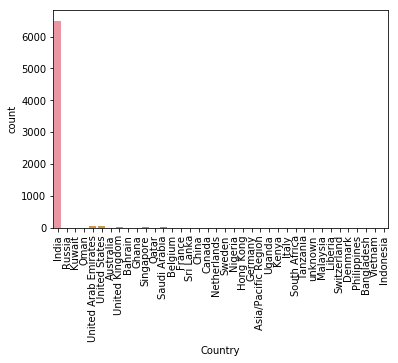

In [215]:
sns.countplot(df.Country)
xticks(rotation = 90)

In [216]:
## More than 90% of the value is India so we can safely remove this column

df = df.drop('Country',axis=1)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

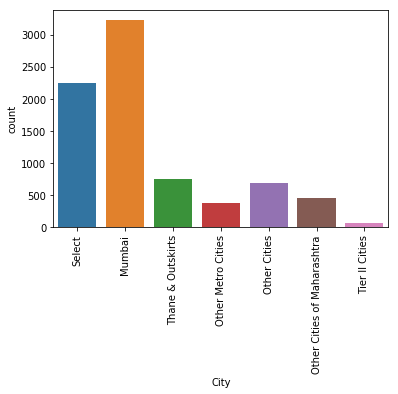

In [217]:
sns.countplot(df.City)
xticks(rotation = 90)

In [218]:
## Select values and null values for City can be imputed as Mumbai

df['City'] = df['City'].fillna(df['City'].mode()[0])
df['City'] = df['City'].replace("Select", "Mumbai")

In [219]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

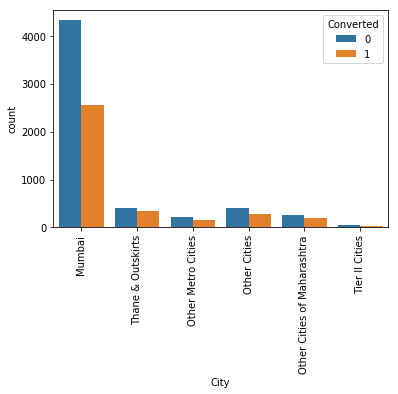

In [220]:
sns.countplot(x = "City", hue = "Converted", data = df)
xticks(rotation = 90)

# Majority Conversion is also from Mumbai

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

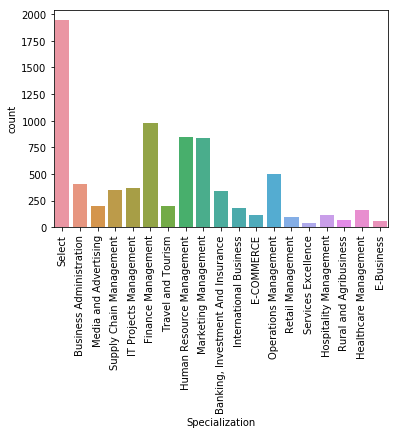

In [221]:
sns.countplot(df['Specialization'])
xticks(rotation = 90)

In [222]:
## Specialization has almost 1750 select values and apart from this 15% null values
## What we can do about this create a category of others for Students or misc.

df['Specialization'] = df['Specialization'].replace(np.nan, 'Others')
df['Specialization'] = df['Specialization'].replace("Select", "Others")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

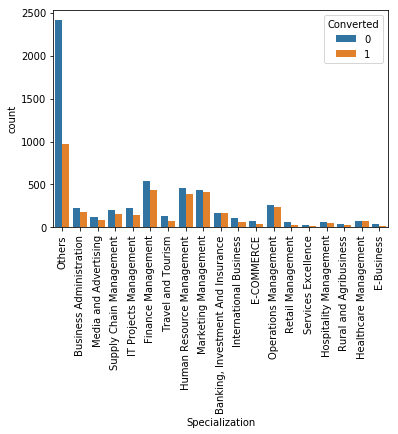

In [223]:
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

# Majority Conversion Data is from Others

In [224]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

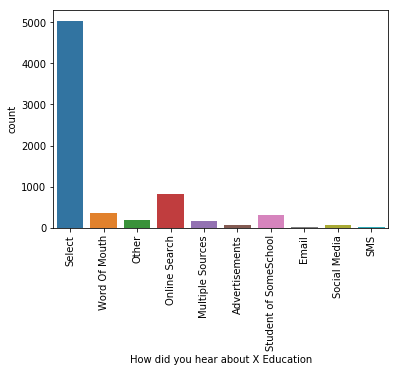

In [225]:
sns.countplot(df['How did you hear about X Education'])
xticks(rotation = 90)

In [226]:
## Column "How did you hear about X Education" column can be dropped as most of the values are select and 23% are null values apart from select

df = df.drop('How did you hear about X Education',axis=1)

In [227]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

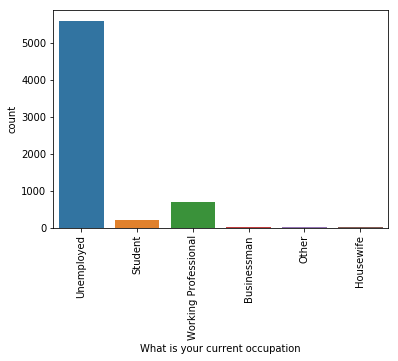

In [228]:
sns.countplot(df['What is your current occupation'])
xticks(rotation = 90)

In [229]:
## Most of the values are unemployed so null values can be imputed as unemployed

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

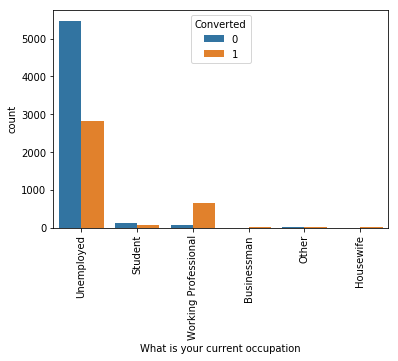

In [230]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

# Max Conversion is from Unemployed, but the ratio of being converted is better in Working Professionals

In [231]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

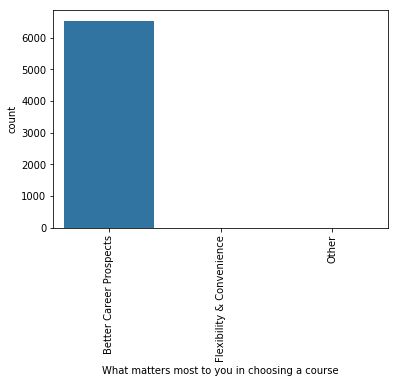

In [232]:
sns.countplot(df['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [233]:
# Since majority data (more than 80% is for Better Career Prospect, if we impute this then it will be more than 90%) so it is safe to drop this column

df = df.drop('What matters most to you in choosing a course', axis=1)

In [234]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

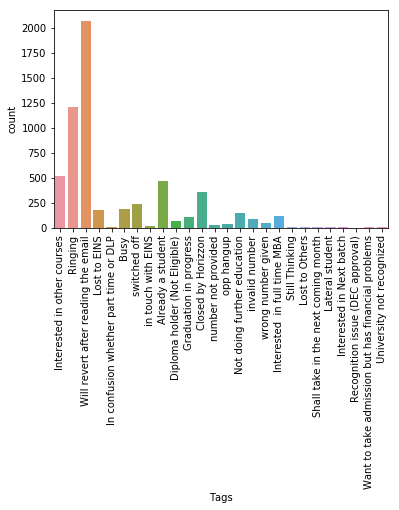

In [235]:
sns.countplot(df['Tags'])
xticks(rotation = 90)

In [236]:
# Since most frequent option is Will Revert after reading the email, we can impute the mode in this case:

df['Tags'] = df['Tags'].fillna(df['Tags'].mode()[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

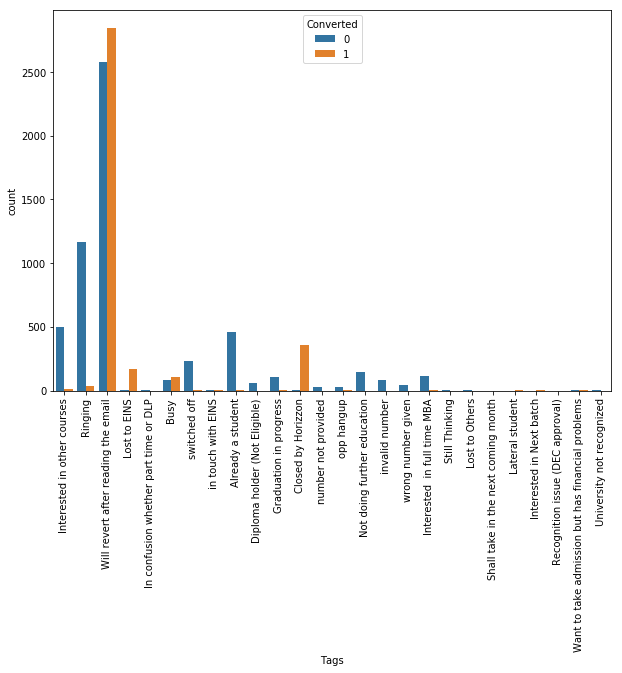

In [237]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)
# We can see that conversion rate of the above imputed option is highest

In [238]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

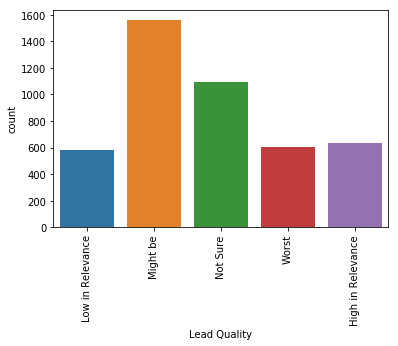

In [239]:
sns.countplot(df['Lead Quality'])
xticks(rotation = 90)

In [240]:
# Lead Quality seems an important parameter as per the business so instead of dropping this we can impute the values to  not sure since whoever was filling the form did not mention explicitly

df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

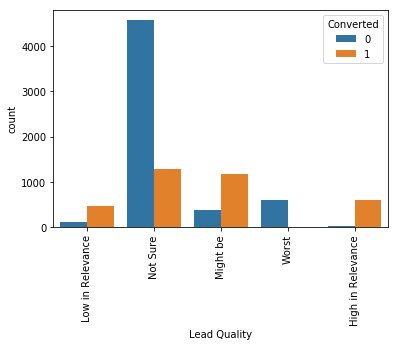

In [241]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
xticks(rotation = 90)

# Low, High in relevance have a better converion ratio but Might be have the most conversions 

In [242]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

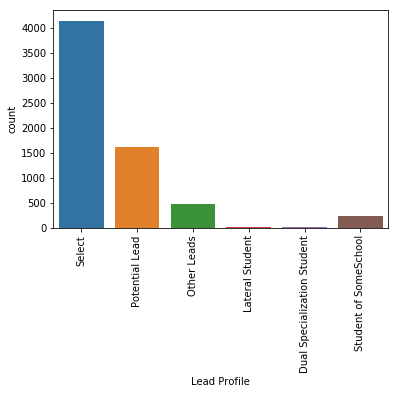

In [243]:
sns.countplot(df['Lead Profile'])
xticks(rotation = 90)

In [244]:
# Lead Profile already has 4000 select values and then 29% null values which makes this column useless, so its safe to drop it

df = df.drop('Lead Profile',axis=1)

In [245]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

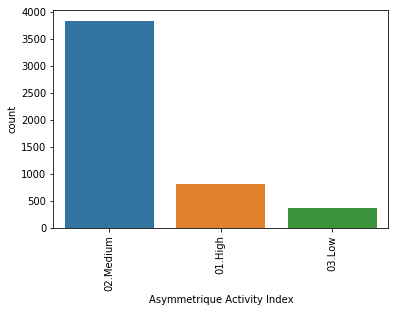

In [246]:
sns.countplot(df['Asymmetrique Activity Index'])
xticks(rotation = 90)

In [247]:
# For this column we can impute the null values to 02.Medium

df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].fillna(df['Asymmetrique Activity Index'].mode()[0])

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

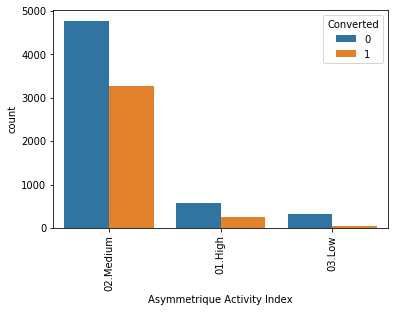

In [248]:
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = df)
xticks(rotation = 90)

In [249]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

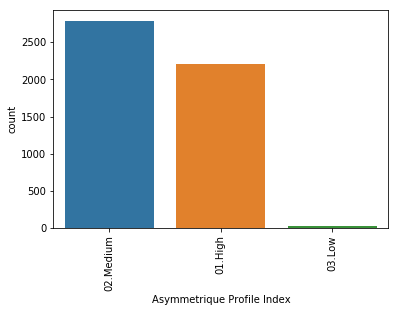

In [250]:
sns.countplot(df['Asymmetrique Profile Index'])
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

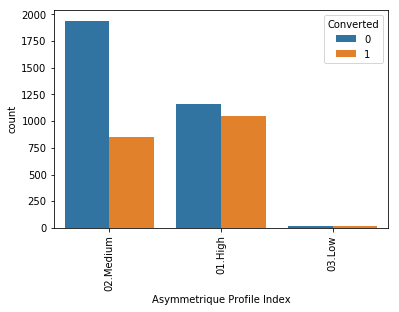

In [251]:
sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", data = df)
xticks(rotation = 90)

In [252]:
# We can not deduce any analysis from this column and since the null values are high we can safely drop this column

df = df.drop('Asymmetrique Profile Index',axis=1)

In [253]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

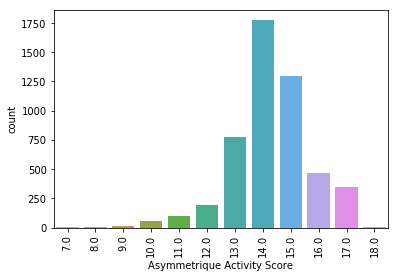

In [254]:
sns.countplot(df['Asymmetrique Activity Score'])
xticks(rotation = 90)

In [255]:
# Values are too close to be imputed in this case and the number of null values is not small, we can drop this column

df = df.drop('Asymmetrique Activity Score',axis=1)

In [256]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

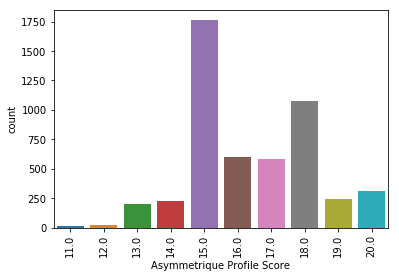

In [257]:
sns.countplot(df['Asymmetrique Profile Score'])
xticks(rotation = 90)

In [258]:
# Values are too close to be imputed in this case and the number of null values is not small, we can drop this column

df = df.drop('Asymmetrique Profile Score',axis=1)

In [259]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [260]:
## For Lead Source, Last Activity, Page Views per Visit, Total visits we can drop 
##those rows which contain null values since the number of missing values is less

df = df.dropna()

In [261]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [262]:
df.shape

(9074, 30)

### Univariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

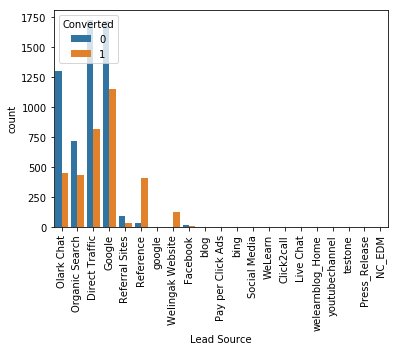

In [263]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

In [264]:
## We can club the values which do not have a considerable impact on Lead Source

df['Lead Source'] = df['Lead Source'].replace(['Pay per Click Ads','bing','blog','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home',
                                               'youtubechannel','testone','Press_Release','NC_EDM'], 'Others')

df.loc[(df['Lead Source'] == 'google'),'Lead Source'] = 'Google'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

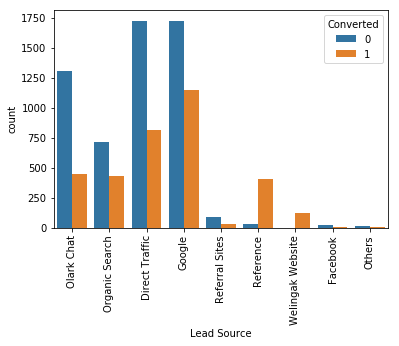

In [265]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

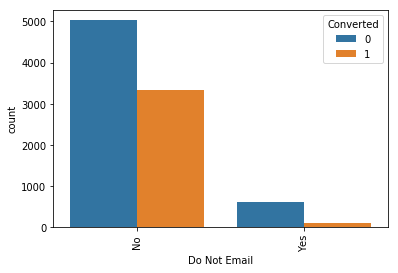

In [266]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = df)
xticks(rotation = 90)

# We can see that There is a very small amount of conversion that has happened when this value is Yes

(array([0, 1]), <a list of 2 Text xticklabel objects>)

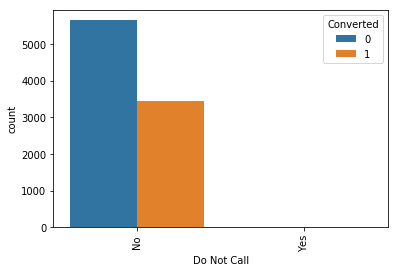

In [267]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = df)
xticks(rotation = 90)

# We can see that There is no value of conversion for Yes value of Do not call

(array([0, 1]), <a list of 2 Text xticklabel objects>)

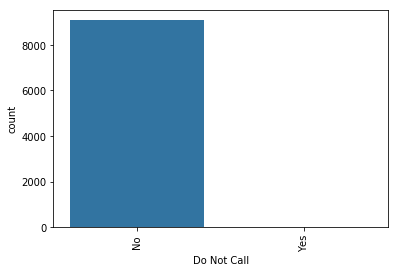

In [268]:
sns.countplot(x = "Do Not Call", data = df)
xticks(rotation = 90)

In [269]:
# Also we can see that there is no value of Yes in this case so we can drop this column since it does not add any value to the data.

df = df.drop('Do Not Call',axis=1)

In [270]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

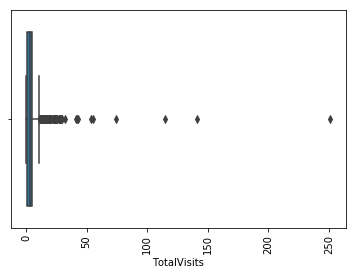

In [271]:
sns.boxplot(x = "TotalVisits", hue = "Converted", data = df)
xticks(rotation = 90)


In [272]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [273]:
# We can see that there are some outliers present so we can treat these outliers before proceeding further

percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

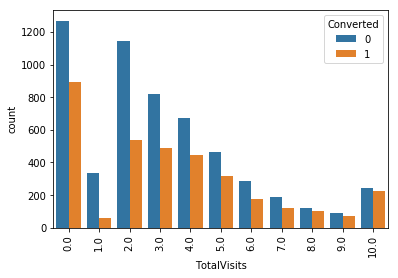

In [274]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = df)
xticks(rotation = 90)

# This data could mean that when a user visits the website often the ratio of conversion gets better

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

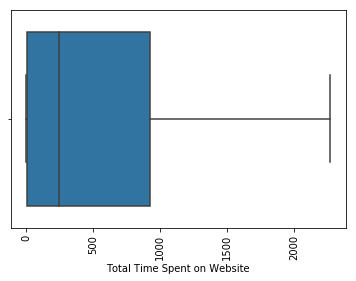

In [275]:
sns.boxplot(x = "Total Time Spent on Website", data = df)
xticks(rotation = 90)


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

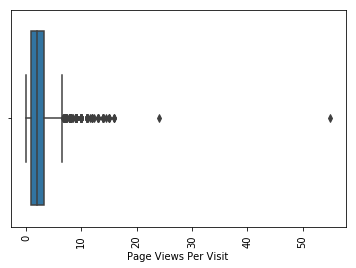

In [276]:
sns.boxplot(x = "Page Views Per Visit",data = df)
xticks(rotation = 90)

In [277]:
## A number of outliers are also present in this case so we can remove these

percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

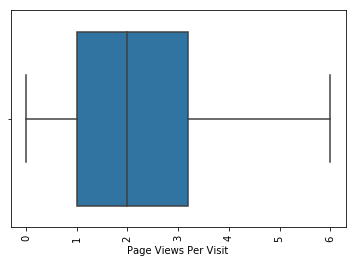

In [278]:
sns.boxplot(x = "Page Views Per Visit",data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

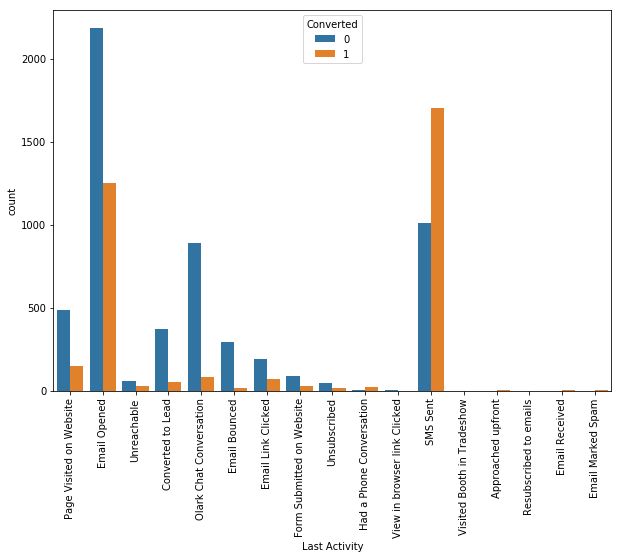

In [279]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

In [280]:
# We can club calues which have no or very less data

df['Last Activity'] = df['Last Activity'].replace(['View in browser link Clicked','Visited Booth in Tradeshow',
                                                   'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

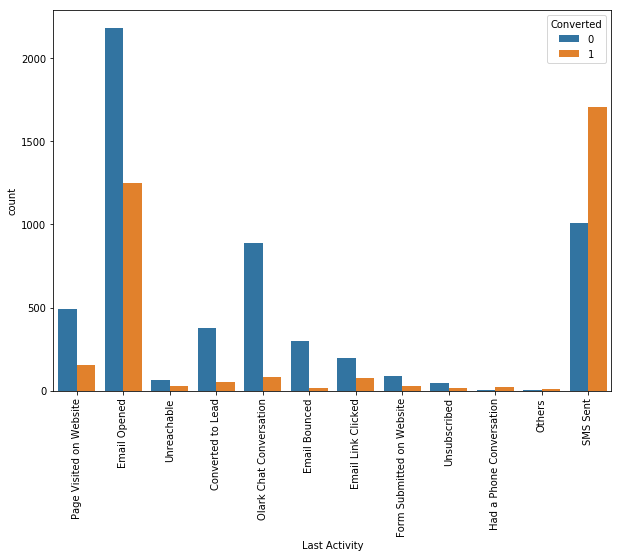

In [281]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

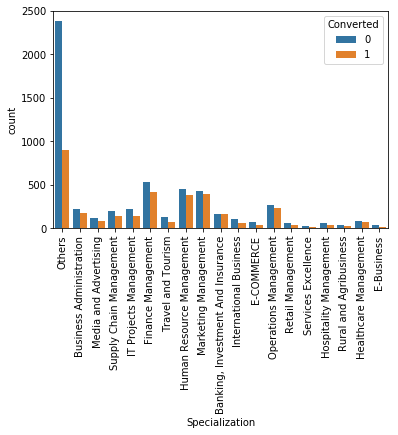

In [282]:
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

In [283]:
# We can club calues which have no or very less data

df['Specialization'] = df['Specialization'].replace(['Services Excellence','Retail Management',
                                                   'Hospitality Management','Rural and Agrbusiness','E-Business'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

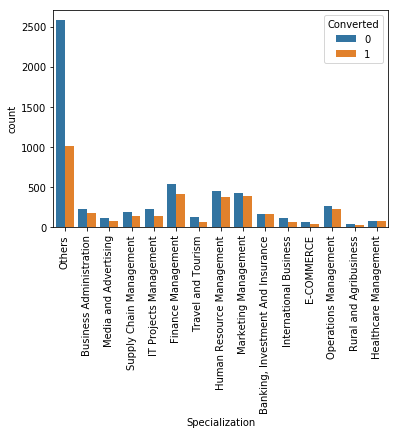

In [284]:
sns.countplot(x = "Specialization", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

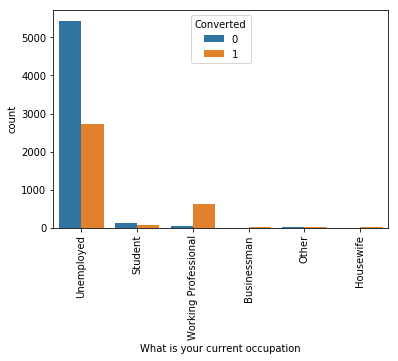

In [285]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
xticks(rotation = 90)

# From here we can see that most of the people are unemployed and have a good conversion rate, but in case of 
## working professionsals, we can see that the number of conversions is more than not converted

(array([0, 1]), <a list of 2 Text xticklabel objects>)

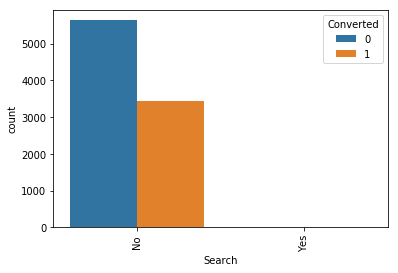

In [286]:
sns.countplot(x = "Search", hue = "Converted", data = df)
xticks(rotation = 90)

In [287]:
# Since there are no values for Yes we can delete this column as well. As it will not add up to the model

df = df.drop('Search',axis=1)

(array([0]), <a list of 1 Text xticklabel objects>)

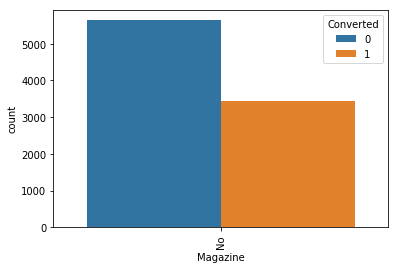

In [288]:
sns.countplot(x = "Magazine", hue = "Converted", data = df)
xticks(rotation = 90)

In [289]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Magazine',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

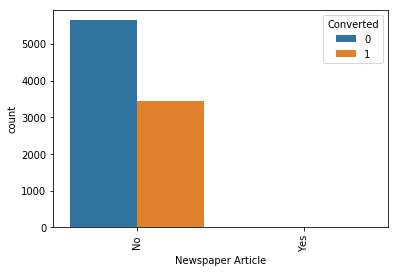

In [290]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)
xticks(rotation = 90)

In [291]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Newspaper Article',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

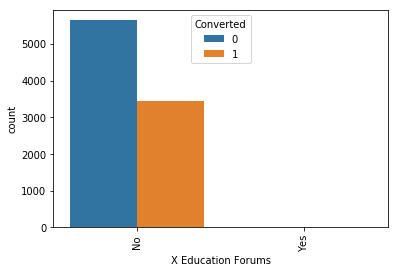

In [292]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)
xticks(rotation = 90)

In [293]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('X Education Forums',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

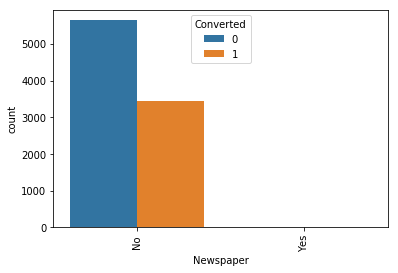

In [294]:
sns.countplot(x = "Newspaper", hue = "Converted", data = df)
xticks(rotation = 90)

In [295]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Newspaper',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

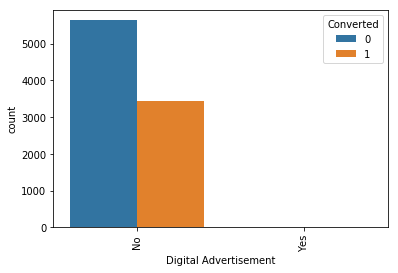

In [296]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
xticks(rotation = 90)

In [297]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Digital Advertisement',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

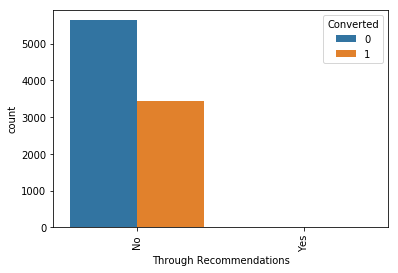

In [298]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
xticks(rotation = 90)

In [299]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Through Recommendations',axis=1)

(array([0]), <a list of 1 Text xticklabel objects>)

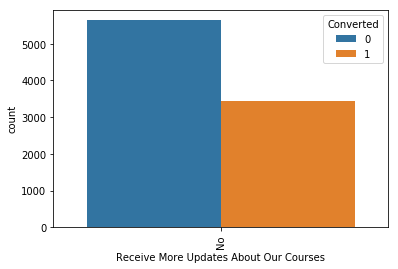

In [300]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df)
xticks(rotation = 90)

In [301]:
# We can drop this column as well as there are no values in yes counterpart so it wont add value to the data

df = df.drop('Receive More Updates About Our Courses',axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

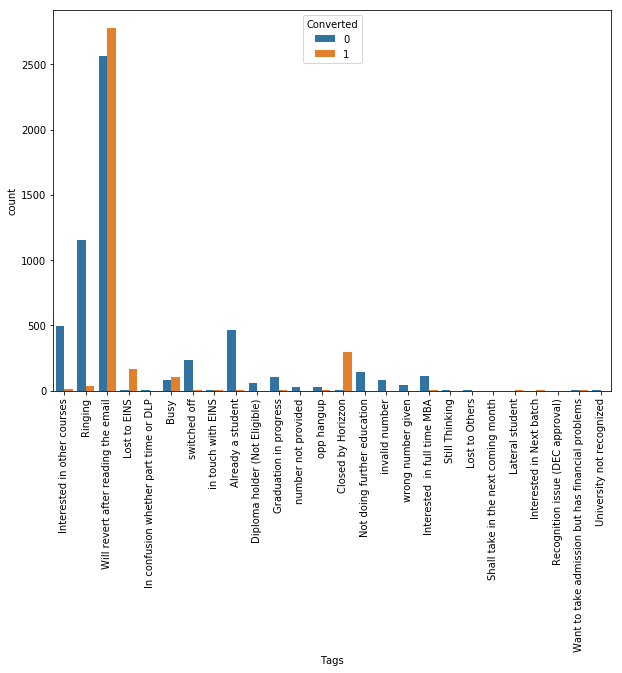

In [302]:
plt.figure(figsize=(10,7))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

In [303]:
# We can club calues which have no or very less data

df['Tags'] = df['Tags'].replace(['Still Thinking','Lost to Others',
                                                   'Shall take in the next coming month','Lateral student','Interested in Next batch','in touch with EINS','In confusion whether part time or DLP', 'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized','opp hangup','number not provided'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

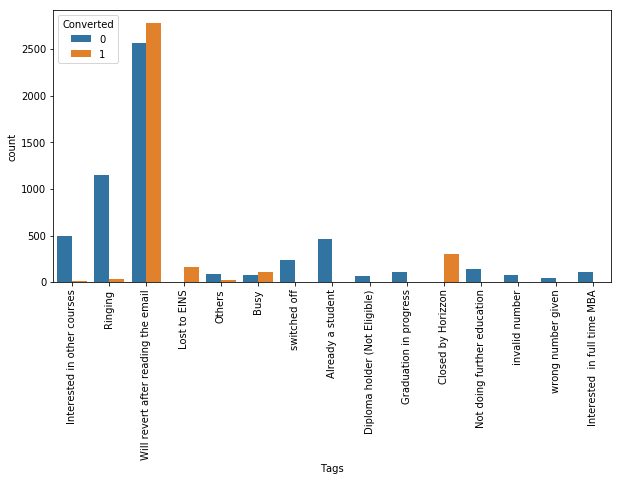

In [304]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

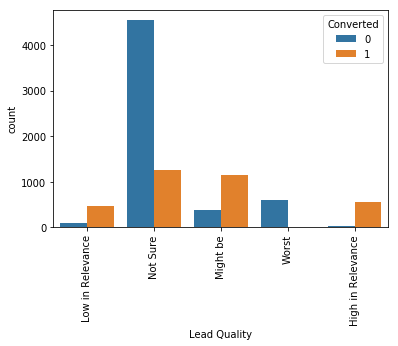

In [305]:
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
xticks(rotation = 90)

(array([0]), <a list of 1 Text xticklabel objects>)

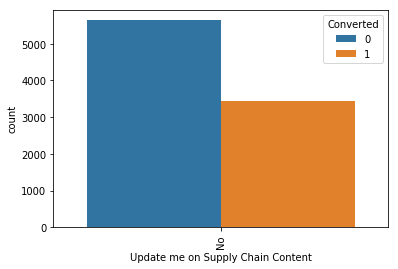

In [306]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df)
xticks(rotation = 90)

In [307]:
# We can drop this variable since there is no data for no

df = df.drop('Update me on Supply Chain Content',axis=1)

(array([0]), <a list of 1 Text xticklabel objects>)

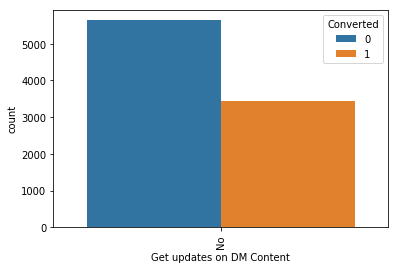

In [308]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df)
xticks(rotation = 90)

In [309]:
# We can drop this variable since there is no data for Get updates on DM Content

df = df.drop('Get updates on DM Content',axis=1)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

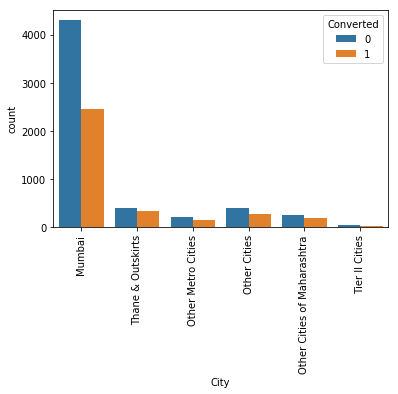

In [310]:
sns.countplot(x = "City", hue = "Converted", data = df)
xticks(rotation = 90)

# Most of the conversions happened from Mumbai

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

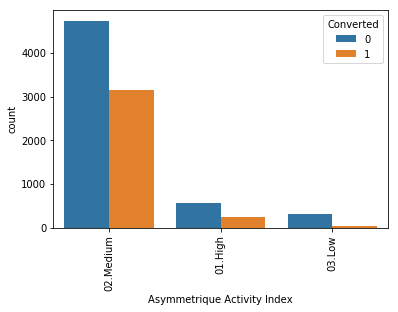

In [311]:
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = df)
xticks(rotation = 90)

# Medium activity has most conversions

In [316]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
xticks(rotation = 90)

ValueError: Could not interpret input 'I agree to pay the amount through cheque'

In [318]:
# We can drop this variable since there is no data for I agree to pay through cheque

df = df.drop('I agree to pay the amount through cheque',axis=1)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

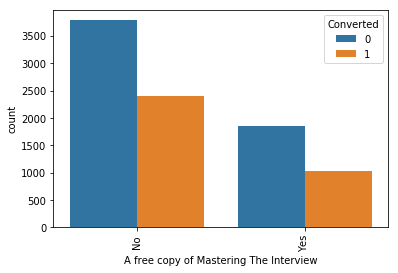

In [319]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
xticks(rotation = 90)

# Highest conversion with value no

In [320]:
df.shape

(9074, 18)

In [321]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [322]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,No,Modified


#### Now only relevant columns are selected and there are no null values or outliers in the data, we can proceed with Dummy variable creation

### Dummy Variable Creation

In [323]:
# List of variables to map which are in the form of Yes/No

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def mapping(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(mapping)

In [324]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source',
        'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
dummy1.head()

,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [325]:
# Adding the results to the original dataset
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [326]:
df = df.drop(['Lead Origin', 'Lead Source',
        'Last Activity', 'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [327]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [328]:
df = df.drop('Lead Number',axis=1)
# Dropping Lead number since both prospect id and Lead Number are unique we can keep just one column

In [329]:
df.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Performing Test-Train Split

In [330]:
X = df.drop(['Prospect ID','Converted'], axis=1)

In [331]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [332]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [333]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [334]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


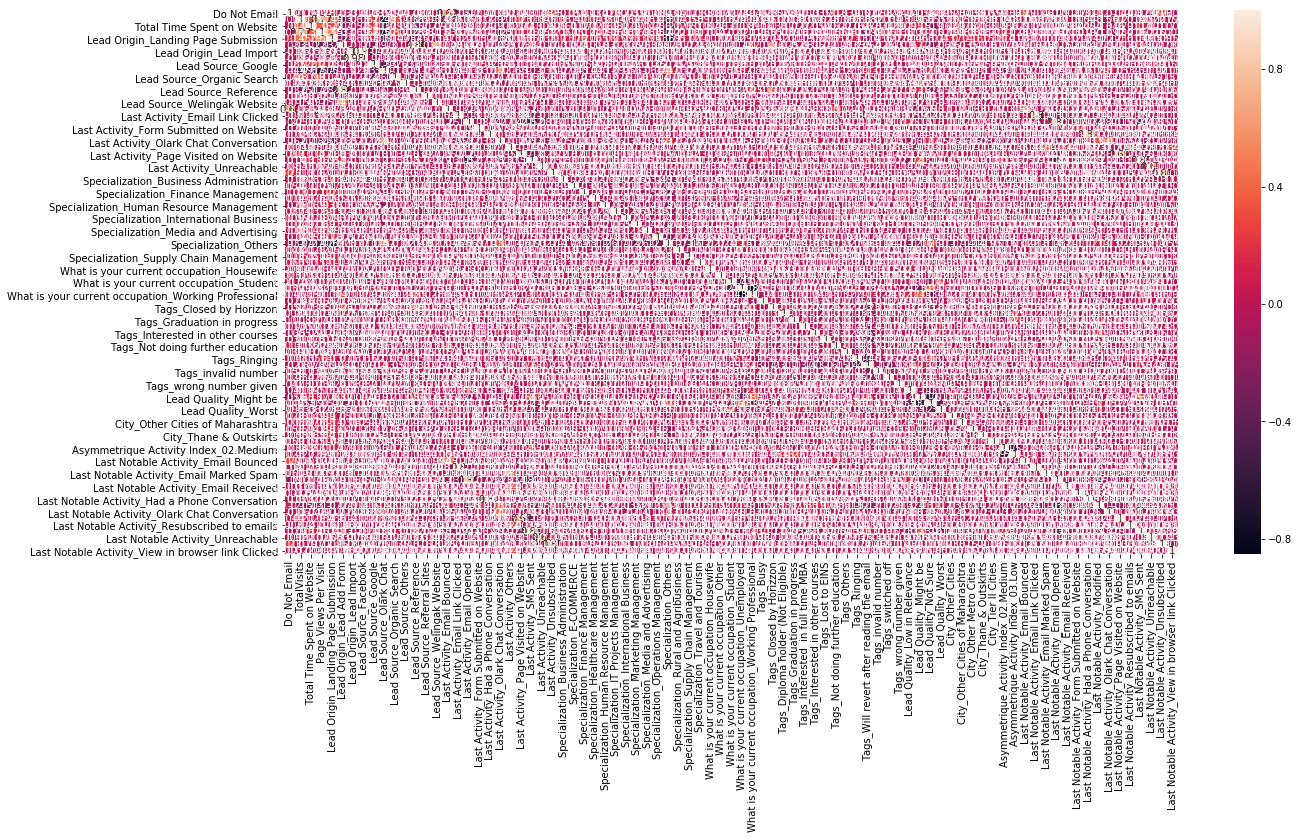

In [335]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### First Model Using all Columns

In [336]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1237.7
Date:                Mon, 26 Aug 2019   Deviance:                       2475.4
Time:                        22:05:54   Pearson chi2:                 3.27e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.4327   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3812      0.329     -4.195      0.000      -2.027      -0.736
TotalVisits                                              0.1971      0.087      2.255      0.024       0.026       0.368
Total Time Spent on Website                              1.1489      0.064     17.925      0.000       1.023       1.274
Page Views Per Visit                                    -0.3373      0.100     -3.387      0.001      -0.532      -0.142
Lead Origin_Landing Page Submission                     -0.8550      0.202     -4.241      0.000      -1.250      -0.460
Lead Origin_Lead Add Form                               -0.3734      1.287     -0.290      0.772      -2.896       2.149
Lead Origin_Lead Import                                 30.0433   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.9892   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2102      0.156      1.351      0.177      -0.095       0.515
Lead Source_Olark Chat                                   0.8188      0.237      3.462      0.001       0.355       1.282
Lead Source_Organic Search                               0.2400      0.211      1.138      0.255      -0.173       0.653
Lead Source_Others                                       0.7209      0.813      0.886      0.375      -0.873       2.315
Lead Source_Reference                                    1.7740      1.344      1.320      0.187      -0.861       4.409
Lead Source_Referral Sites                              -0.0935      0.504     -0.186      0.853      -1.081       0.894
Lead Source_Welingak Website                             5.4808      1.490      3.678      0.000       2.560       8.402
Last Activity_Email Bounced                             -0.4925      0.885     -0.557      0.578      -2.226       1.241
Last Activity_Email Link Clicked                         0.8729      0.650      1.343      0.179      -0.401       2.147
Last Activity_Email Opened                               0.0770      0.388      0.198      0.843      -0.683       0.837
Last Activity_Form Submitted on Website                  0.2176      0.617      0.352      0.724      -0.993       1.428
Last Activity_Had a Phone Conversation                   2.8042      5.813      0.482      0.630      -8.588      14.197
Last Activity_Olark Chat Conversation                   -0.5261      0.398     -1.322      0.186      -1.306       0.254
Last Activity_Others                                     1.8588      1.425      1.305      0.192      -0.934       4.652
Last Activity_Pa

### Feature selection using RFE

In [337]:
logreg = LogisticRegression()

In [338]:
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [339]:
rfe.support_

array([ True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [340]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 4),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 6),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 50),
 ('Lead Source_Reference', False, 66),
 ('Lead Source_Referral Sites', False, 57),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 31),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 64),
 ('Last Activity_Form Submitted on Website', False, 63),
 ('Last Activity_Had a Phone Conversation', False, 15),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Others', False, 20),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last

In [341]:
col = X_train.columns[rfe.support_]

In [342]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Special

In [343]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1569.0
Date:                Mon, 26 Aug 2019   Deviance:                       3137.9
Time:                        22:06:21   Pearson chi2:                 3.01e+04
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8151      0.217     -8.383      0.000      -2.239      -1.391
Do Not Email                                            -1.3185      0.213     -6.177      0.000      -1.737      -0.900
Lead Origin_Lead Add Form                                1.0485      0.365      2.870      0.004       0.333       1.765
Lead Source_Welingak Website                             3.5098      0.823      4.265      0.000       1.897       5.123
What is your current occupation_Working Professional     1.3158      0.292      4.500      0.000       0.743       1.889
Tags_Busy                                                3.5763      0.331     10.797      0.000       2.927       4.225
Tags_Closed by Horizzon                                  7.8220      0.773     10.123      0.000       6.308       9.336
Tags_Lost to EINS                                        9.1914      0.765     12.013      0.000       7.692      10.691
Tags_Ringing                                            -1.9274      0.340     -5.672      0.000      -2.594      -1.261
Tags_Will revert after reading the email                 3.7407      0.229     16.324      0.000       3.292       4.190
Tags_invalid number                                    -22.4695   1.34e+04     -0.002      0.999   -2.63e+04    2.63e+04
Tags_switched off                                       -2.5637      0.590     -4.347      0.000      -3.720      -1.408
Lead Quality_Not Sure                                   -3.3588      0.129    -25.954      0.000      -3.612      -3.105
Lead Quality_Worst                                      -3.7688      0.828     -4.550      0.000      -5.392      -2.145
Asymmetrique Activity Index_03.Low                      -1.6895      0.355     -4.756      0.000      -2.386      -0.993
Last Notable Activity_SMS Sent                           2.7632      0.122     22.666      0.000       2.524       3.002
========================================================================================================================
"""

In [344]:
col = col.drop('Tags_invalid number', 1)

In [345]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1575.0
Date:                Mon, 26 Aug 2019   Deviance:                       3150.0
Time:                        22:06:31   Pearson chi2:                 2.98e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9804      0.219     -9.059      0.000      -2.409      -1.552
Do Not Email                                            -1.3083      0.213     -6.146      0.000      -1.726      -0.891
Lead Origin_Lead Add Form                                1.0806      0.367      2.944      0.003       0.361       1.800
Lead Source_Welingak Website                             3.4711      0.823      4.216      0.000       1.858       5.085
What is your current occupation_Working Professional     1.3540      0.295      4.585      0.000       0.775       1.933
Tags_Busy                                                3.7569      0.330     11.377      0.000       3.110       4.404
Tags_Closed by Horizzon                                  7.9732      0.773     10.313      0.000       6.458       9.488
Tags_Lost to EINS                                        9.3452      0.766     12.204      0.000       7.844      10.846
Tags_Ringing                                            -1.7307      0.338     -5.118      0.000      -2.393      -1.068
Tags_Will revert after reading the email                 3.9039      0.231     16.926      0.000       3.452       4.356
Tags_switched off                                       -2.3602      0.589     -4.010      0.000      -3.514      -1.207
Lead Quality_Not Sure                                   -3.3501      0.129    -25.939      0.000      -3.603      -3.097
Lead Quality_Worst                                      -3.7780      0.829     -4.558      0.000      -5.402      -2.154
Asymmetrique Activity Index_03.Low                      -1.6737      0.356     -4.704      0.000      -2.371      -0.976
Last Notable Activity_SMS Sent                           2.7220      0.120     22.649      0.000       2.486       2.958
========================================================================================================================
"""

In [346]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.193637
1012    0.200862
9226    0.000857
4750    0.785071
7987    0.982273
1281    0.990487
2880    0.193637
4971    0.759218
7536    0.872534
1248    0.000857
dtype: float64

In [347]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.93637163e-01, 2.00861580e-01, 8.57057337e-04, 7.85070762e-01,
       9.82272561e-01, 9.90487247e-01, 1.93637163e-01, 7.59218157e-01,
       8.72533890e-01, 8.57057337e-04])

In [348]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.193637,3009
1,0,0.200862,1012
2,0,0.000857,9226
3,1,0.785071,4750
4,1,0.982273,7987


In [349]:
# Creating a column "predicted" will be 1 if prob is > than 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.193637,3009,0
1,0,0.200862,1012,0
2,0,0.000857,9226,0
3,1,0.785071,4750,1
4,1,0.982273,7987,1


In [350]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3758  147]
 [ 367 2079]]


In [351]:
# Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9190678633286097


### Checking VIF Values for different features

In [352]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.81
10,Lead Quality_Not Sure,2.80
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.54
13,Last Notable Activity_SMS Sent,1.52
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11


##### VIF value for all the features is below the threshold

### Metrics apart from accuracy

In [149]:
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [353]:
# Sensitivity
TP / float(TP+FN)

0.8432760364004045

In [354]:
# Specificity
TN / float(TN+FP)

0.9440599769319492

In [355]:
# False postive rate
print(FP/ float(TN+FP))

0.05594002306805075


In [356]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.8958109559613319


In [358]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9135044642857143


### Plotting the ROC Curve

In [359]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [360]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

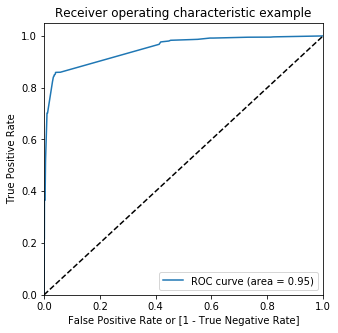

In [361]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Optimal Cut off Point

In [362]:
# Different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193637,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.200862,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.000857,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.785071,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.982273,7987,1,1,1,1,1,1,1,1,1,1,1


In [363]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.718470     0.980376     0.554417
0.2          0.2  0.910250     0.859771     0.941869
0.3          0.3  0.919225     0.859362     0.956722
0.4          0.4  0.920170     0.858136     0.959027
0.5          0.5  0.919068     0.849959     0.962356
0.6          0.6  0.919068     0.847915     0.963636
0.7          0.7  0.918438     0.841374     0.966709
0.8          0.8  0.877815     0.702780     0.987452
0.9          0.9  0.813100     0.523303     0.994622


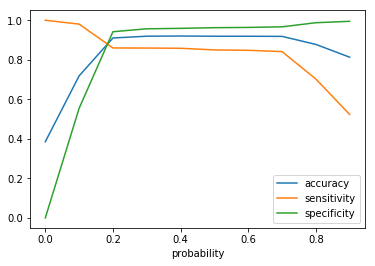

In [364]:
# Plot for 'accuracy','sensitivity','specificity'against Probability
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [365]:
### We can clearly see that 0.2 comes out to be an optimal cut off point in this case

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193637,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.200862,1012,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.000857,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.785071,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.982273,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

We are done with the major part of the analysis and prediction now we can finally create a Lead Score column and assign their values

In [366]:
y_train_pred_final['Lead Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.193637,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.200862,1012,0,1,1,1,0,0,0,0,0,0,0,1,20
2,0,0.000857,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.785071,4750,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.982273,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [367]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1]
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [368]:
# Sensitivity
TP / float(TP+FN)

0.8597710547833197

In [369]:
# Specificity
TN / float(TN+FP)

0.9418693982074263

In [370]:
# False Postive Rate
print(FP/ float(TN+FP))

0.05813060179257362


In [371]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9025751072961373


In [372]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9146978363591146


### Precision and Recall


In [373]:
# Confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3758,  147],
       [ 367, 2079]], dtype=int64)

In [374]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9339622641509434

In [375]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8499591169255928

In [376]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9339622641509434

In [377]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8499591169255928

In [378]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [379]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

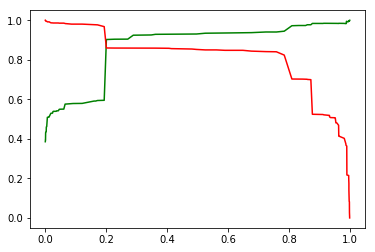

In [380]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Prediction for Test Dataset

In [381]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [382]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [383]:
X_test_sm = sm.add_constant(X_test)

In [384]:
y_test_pred = res.predict(X_test_sm)

In [385]:
y_test_pred[:10]

3271    0.193637
1490    0.963649
7936    0.193637
4216    0.999153
3830    0.193637
1800    0.963649
6507    0.012880
4821    0.000457
4223    0.996751
4714    0.193637
dtype: float64

In [386]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [387]:
# Let's see the head
y_pred_1.head()

,0
3271,0.193637
1490,0.963649
7936,0.193637
4216,0.999153
3830,0.193637


In [389]:
y_test_df = pd.DataFrame(y_test)

In [390]:
# Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [391]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [392]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [393]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.193637
1,1,1490,0.963649
2,0,7936,0.193637
3,1,4216,0.999153
4,0,3830,0.193637


In [394]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [395]:
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [396]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.193637
1,1490,1,0.963649
2,7936,0,0.193637
3,4216,1,0.999153
4,3830,0,0.193637


In [397]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [398]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.193637,0
1,1490,1,0.963649,1
2,7936,0,0.193637,0
3,4216,1,0.999153,1
4,3830,0,0.193637,0


In [399]:
# Overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9074550128534704

In [400]:
confusion_matrix1 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_matrix1

array([[1637,   97],
       [ 155,  834]], dtype=int64)

In [401]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [402]:
# Sensitivity
TP / float(TP+FN)

0.8597710547833197

In [403]:
# Specificity
TN / float(TN+FP)

0.9418693982074263